# Project Title: Fake Review Detection and Analysis

## Importing libraries and data

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
# import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

### Import data

Importing the data from csv files.
The complete dataset was stored in a sqlite database and so a connection was required to the database.
For the submission purpose the sample data is saved in the csv format.

In [6]:
yelp_restaurant = pd.read_csv("data/restaurant.csv")
yelp_restaurant.drop('Unnamed: 0', axis=1, inplace=True)

yelp_reviewer = pd.read_csv("data/reviewer.csv")
yelp_reviewer.drop('Unnamed: 0', axis=1, inplace=True)

yelp_review = pd.read_csv("data/review.csv")
yelp_review.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
yelp_review.head()

,date,reviewID,reviewerID,rating,usefulCount,coolCount,funnyCount,flagged,restaurantID
0,11/28/2011,nWtrf2j3JR,vv_YFEMLBVwFkxuFj0nISg,5,0,2,7,N,pbEiXam9YJL3neCYHGwLUA
1,10/19/2011,xWNqFP9v7w3ovpAcNrSdYA,ir689oBNmrJXOspb4yq_Jg,5,1,2,0,N,pbEiXam9YJL3neCYHGwLUA
2,3/22/2009,0ZaIorCP,Jrm34VNH85jMCtFevsSz6Q,4,1,1,0,N,pbEiXam9YJL3neCYHGwLUA
3,6/24/2010,P4,MEvIFUnUtQbythmc_mE3Aw,5,0,0,0,N,pbEiXam9YJL3neCYHGwLUA
4,3/22/2010,t6v42m9fKDPiVHyqaxYtFg,ivlqPjxpAqQ7W2AFNyZhdw,5,0,1,0,N,pbEiXam9YJL3neCYHGwLUA


Filtering the **"yelp_review"** table only for reviews with flagged as Y or N and their corresponding required values in the other two tables.  
  
The providers mention that Reviews with Y/N are *"Reviews obtained from the restaurant page wherein we get all Y reviews from the filtered section and N reviews from the regular page."*  
  
We do this for the following reasons:
    *  To limit the data that we have to work with.
    *  To use the results from "What Yelp Fake Review Filter might be Doing?" (ICWSM'13) as a baseline for comparison.

In [9]:
yelp_review_text = pd.read_csv("data/reviewContent.csv")
yelp_review_text.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
yelp_review_text.head()

,reviewID,reviewContent,flagged
0,JKsgNf8k1-YVL-TlprqvsQ,"I am a huge oyster person, loved the hama hama...",N
1,e5kAHSdPfanRedY9mV9Jrw,"Excellent!!! Great food, reasonable price, an...",Y
2,3DX7DAo8Hs4DGIJY6tnj1w,BEAUTIFUL patio outside!! The location is so ...,N
3,HH3wTL0t98M9ZZEKtKKF1Q,I have been to Shaw's a few times over the yea...,N
4,4sGk0iD67IMVRmG,Fast service and awesome food. Burrata cheese...,N


Generating the textual features from the review content

In [11]:
from text_feat import get_text_feat

get_text_feat(yelp_review_text)

In [12]:
yelp_review_text.head()

,reviewID,reviewContent,polarity,subjectivity,profanity check,review_length,no_of_stopwords,char_count,word_density,punctuation_count,upper_case_word_count,noun_count,verb_count,adj_count,adv_count,pron_count
0,JKsgNf8k1-YVL-TlprqvsQ,"I am a huge oyster person, loved the hama hama...",0.4806,0.7295,0,45,13,198,4.304348,9,1,7,9,5,4,4
1,e5kAHSdPfanRedY9mV9Jrw,"Excellent!!! Great food, reasonable price, an...",0.6017,0.6217,0,67,22,326,4.794118,14,0,12,12,6,4,8
2,3DX7DAo8Hs4DGIJY6tnj1w,BEAUTIFUL patio outside!! The location is so ...,0.2373,0.6022,0,114,43,554,4.817391,15,1,20,18,13,16,7
3,HH3wTL0t98M9ZZEKtKKF1Q,I have been to Shaw's a few times over the yea...,0.3542,0.6431,0,154,66,749,4.832258,21,5,39,24,10,6,16
4,4sGk0iD67IMVRmG,Fast service and awesome food. Burrata cheese...,0.7333,0.6333,0,22,6,120,5.217391,2,1,9,3,2,1,1


Performing topic modelling on the reviews

In [13]:
from lda import text_prepare

clean_doc, dictionary, doc_term_matrix = text_prepare(yelp_review_text)

In [14]:
from lda import model_lda

modellda = model_lda(clean_doc, dictionary, doc_term_matrix)

Topics generated with the in-built LDA model are:

[(18,
  '0.000*"costilla" + 0.000*"delightfully" + 0.000*"drinker" + 0.000*"kill" + '
  '0.000*"obvioulsy" + 0.000*"chimmicurri" + 0.000*"churrasco" + '
  '0.000*"burgergreat" + 0.000*"declared" + 0.000*"pato"'),
 (11,
  '0.037*"changed" + 0.000*"opart" + 0.000*"grunt" + 0.000*"past" + '
  '0.000*"run" + 0.000*"cooking" + 0.000*"moving" + 0.000*"90" + '
  '0.000*"churros" + 0.000*"decline"'),
 (12,
  '0.048*"giordanos" + 0.003*"alway" + 0.000*"ginos" + 0.000*"topping" + '
  '0.000*"cheesecake" + 0.000*"malnatis" + 0.000*"caramelized" + 0.000*"niece" '
  '+ 0.000*"east" + 0.000*"tourist"'),
 (0,
  '0.019*"win" + 0.019*"why" + 0.012*"hamachi" + 0.008*"traffic" + '
  '0.006*"afraid" + 0.005*"5star" + 0.005*"toro" + 0.000*"ragu" + '
  '0.000*"swordfish" + 0.000*"veuve"'),
 (15,
  '0.030*"skin" + 0.023*"hanging" + 0.015*"piccolo" + 0.014*"amazed" + '
  '0.012*"sogno" + 0.009*"letting" + 0.005*"crumb" + 0.000*"wing" + '
  '0.000*"bbq" + 0.00

In [16]:
import pyLDAvis
pyLDAvis.enable_notebook()

In [21]:
vis_lda = pyLDAvis.gensim.prepare(modellda, doc_term_matrix, dictionary)
vis_lda

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.425089  0.089600       1        1  39.515053
10     0.402807  0.224173       2        1  28.322857
23     0.356351 -0.267102       3        1  16.569685
24     0.080576 -0.207476       4        1   3.531805
19     0.010616 -0.050810       5        1   2.198242
2     -0.026195 -0.017847       6        1   1.503819
20    -0.025382 -0.008096       7        1   1.456779
21    -0.044761  0.007095       8        1   1.147548
9     -0.046113  0.004180       9        1   1.133359
4     -0.049827  0.010324      10        1   1.018492
7     -0.057670  0.002100      11        1   0.800736
16    -0.069118  0.015820      12        1   0.582227
22    -0.045779  0.021851      13        1   0.444039
6     -0.073751  0.016606      14        1   0.407577
14    -0.076353  0.016275      15        1   0.293592
8     -0.076719  0.015944      16        1   0.197250
3     -0.077240  0.015789      17        1   0.195681
17    -0.077503  0.015445      18        1   0.183957
1     -0.077412  0.015519      19        1   0.175009
13    -0.076918  0.014748      20        1   0.109978
15    -0.076205  0.014071      21        1   0.076387
0     -0.075529  0.013495      22        1   0.061791
12    -0.074911  0.013160      23        1   0.037897
11    -0.074543  0.012909      24        1   0.027648
18    -0.073508  0.012225      25        1   0.008591, topic_info=     Category        Freq           Term       Total  loglift  logprob
374   Default  292.000000          pizza  292.000000  30.0000  30.0000
33    Default  901.000000           good  901.000000  29.0000  29.0000
34    Default  668.000000          great  668.000000  28.0000  28.0000
1339  Default  140.000000            hot  140.000000  27.0000  27.0000
83    Default  340.000000          table  340.000000  26.0000  26.0000
347   Default  340.000000              u  340.000000  25.0000  25.0000
102   Default  294.000000        chicago  294.000000  24.0000  24.0000
45    Default  635.000000           time  635.000000  23.0000  23.0000
474   Default  134.000000           line  134.000000  22.0000  22.0000
13    Default  963.000000          place  963.000000  21.0000  21.0000
1325  Default  123.000000       sandwich  123.000000  20.0000  20.0000
371   Default  271.000000        ordered  271.000000  19.0000  19.0000
311   Default   85.000000            fry   85.000000  18.0000  18.0000
156   Default  286.000000            got  286.000000  17.0000  17.0000
135   Default  321.000000           best  321.000000  16.0000  16.0000
872   Default   81.000000           duck   81.000000  15.0000  15.0000
123   Default  412.000000     restaurant  412.000000  14.0000  14.0000
455   Default  243.000000           come  243.000000  13.0000  13.0000
385   Default  201.000000           came  201.000000  12.0000  12.0000
459   Default  346.000000           dish  346.000000  11.0000  11.0000
36    Default  194.000000         minute  194.000000  10.0000  10.0000
640   Default  207.000000            two  207.000000   9.0000   9.0000
266   Default  284.000000          order  284.000000   8.0000   8.0000
183   Default  259.000000          thing  259.000000   7.0000   7.0000
192   Default  425.000000           back  425.000000   6.0000   6.0000
337   Default  164.000000         server  164.000000   5.0000   5.0000
138   Default  233.000000         cheese  233.000000   4.0000   4.0000
68    Default  231.000000           much  231.000000   3.0000   3.0000
230   Default   72.000000      breakfast   72.000000   2.0000   2.0000
2093  Default   48.000000            dog   48.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
4110  Topic25    0.000701        brazzaz    0.593026   2.6217  -9.0961
2970  Topic25    0.000701    pretentious    0.593026   2.6217  -9.0961
2976  Topic25    0.000701       uncommon    0.593026   2.6217  -9.0961
2975  Topic25 

Handle all the replace value by replacing them with a string. This will help with the label encoding step

In [26]:
from lda import model_mallet

modelmallet = model_mallet(clean_doc, dictionary, doc_term_matrix)

Topics generated with the in-built LDA model are:

[(17,
  [('bar', 0.08461538461538462),
   ('drink', 0.0665158371040724),
   ('feel', 0.033936651583710405),
   ('cocktail', 0.023076923076923078),
   ('area', 0.021266968325791856),
   ('music', 0.01809954751131222),
   ('glass', 0.0167420814479638),
   ('early', 0.0167420814479638),
   ('loved', 0.015384615384615385),
   ('bartender', 0.014479638009049774)]),
 (12,
  [('hot', 0.06790123456790123),
   ('wait', 0.04938271604938271),
   ('place', 0.04510921177587844),
   ('dog', 0.042735042735042736),
   ('worth', 0.04036087369420703),
   ('chicago', 0.03323836657169991),
   ('line', 0.03133903133903134),
   ('make', 0.02801519468186135),
   ('sausage', 0.024691358024691357),
   ('fry', 0.023741690408357077)]),
 (20,
  [('love', 0.10660377358490566),
   ('place', 0.08490566037735849),
   ('ive', 0.05),
   ('breakfast', 0.03820754716981132),
   ('brunch', 0.033962264150943396),
   ('egg', 0.030660377358490566),
   ('fan', 0.02358490566037

In [27]:
vis_mallet = pyLDAvis.gensim.prepare(modelmallet, doc_term_matrix, dictionary)
vis_mallet

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
10    -0.011281 -0.158994       1        1  4.717518
5     -0.045698 -0.045974       2        1  4.495202
9      0.081771 -0.072606       3        1  4.407820
4     -0.013289 -0.096120       4        1  4.197523
24     0.031993 -0.084949       5        1  4.190969
8     -0.049273 -0.073568       6        1  4.183502
14     0.069067 -0.083388       7        1  4.099574
16    -0.005424 -0.071202       8        1  4.069744
17     0.004552 -0.104105       9        1  4.026647
13     0.058402 -0.144571      10        1  4.023519
19    -0.070429 -0.002356      11        1  3.982368
6      0.214056  0.151023      12        1  3.976009
1     -0.000025 -0.091606      13        1  3.963032
15     0.235797  0.124317      14        1  3.950452
7     -0.242455  0.152327      15        1  3.884068
22     0.109530  0.012409      16        1  3.849842
18    -0.097149  0.203486      17        1  3.842311
2     -0.114900  0.185056      18        1  3.840115
23     0.148791  0.197272      19        1  3.822012
11    -0.008239 -0.114040      20        1  3.815360
12    -0.185318 -0.009790      21        1  3.783092
20    -0.205061  0.138394      22        1  3.757961
0     -0.016642 -0.120379      23        1  3.730805
21    -0.128338  0.008119      24        1  3.715950
3      0.239563  0.101248      25        1  3.674603, topic_info=     Category        Freq           Term       Total  loglift  logprob
33    Default  928.000000           good  928.000000  30.0000  30.0000
31    Default  982.000000           food  982.000000  29.0000  29.0000
13    Default  994.000000          place  994.000000  28.0000  28.0000
34    Default  668.000000          great  668.000000  27.0000  27.0000
45    Default  630.000000           time  630.000000  26.0000  26.0000
374   Default  407.000000          pizza  407.000000  25.0000  25.0000
159   Default  364.000000             im  364.000000  24.0000  24.0000
42    Default  463.000000        service  463.000000  23.0000  23.0000
202   Default  305.000000         friend  305.000000  22.0000  22.0000
256   Default  362.000000           love  362.000000  21.0000  21.0000
543   Default  357.000000           menu  357.000000  20.0000  20.0000
47    Default  369.000000           wait  369.000000  19.0000  19.0000
83    Default  353.000000          table  353.000000  18.0000  18.0000
2     Default  313.000000      delicious  313.000000  17.0000  17.0000
192   Default  422.000000           back  422.000000  16.0000  16.0000
459   Default  359.000000           dish  359.000000  15.0000  15.0000
138   Default  281.000000         cheese  281.000000  14.0000  14.0000
69    Default  245.000000           nice  245.000000  13.0000  13.0000
53    Default  250.000000            bar  250.000000  12.0000  12.0000
142   Default  306.000000           make  306.000000  11.0000  11.0000
102   Default  318.000000        chicago  318.000000  10.0000  10.0000
205   Default  373.000000            ive  373.000000   9.0000   9.0000
123   Default  418.000000     restaurant  418.000000   8.0000   8.0000
266   Default  303.000000          order  303.000000   7.0000   7.0000
52    Default  236.000000        amazing  236.000000   6.0000   6.0000
363   Default  202.000000           beer  202.000000   5.0000   5.0000
501   Default  201.000000           star  201.000000   4.0000   4.0000
460   Default  238.000000          drink  238.000000   3.0000   3.0000
1339  Default  186.000000            hot  186.000000   2.0000   2.0000
371   Default  279.000000        ordered  279.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
563   Topic25    3.766727            sum    3.766727   3.3037  -6.5653
5136  Topic25    3.766727        vibrant    3.766727   3.3037  -6.5653
7151  Topic25    2.511152           norm    2.511152   3.3037  -6.9707
867   Topic25   46.456304      attentive 

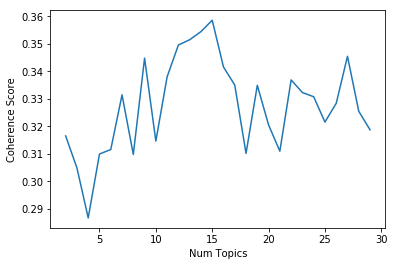

In [28]:
from lda import get_optimum_topics

get_optimum_topics(yelp_review_text, dictionary, doc_term_matrix, clean_doc, start=2, limit=30)

In [29]:
yelp_review_text.head()

,reviewID,reviewContent,polarity,subjectivity,profanity check,review_length,no_of_stopwords,char_count,word_density,punctuation_count,upper_case_word_count,noun_count,verb_count,adj_count,adv_count,pron_count,topic
0,JKsgNf8k1-YVL-TlprqvsQ,"I am a huge oyster person, loved the hama hama...",0.4806,0.7295,0,45,13,198,4.304348,9,1,7,9,5,4,4,2
1,e5kAHSdPfanRedY9mV9Jrw,"Excellent!!! Great food, reasonable price, an...",0.6017,0.6217,0,67,22,326,4.794118,14,0,12,12,6,4,8,3
2,3DX7DAo8Hs4DGIJY6tnj1w,BEAUTIFUL patio outside!! The location is so ...,0.2373,0.6022,0,114,43,554,4.817391,15,1,20,18,13,16,7,13
3,HH3wTL0t98M9ZZEKtKKF1Q,I have been to Shaw's a few times over the yea...,0.3542,0.6431,0,154,66,749,4.832258,21,5,39,24,10,6,16,11
4,4sGk0iD67IMVRmG,Fast service and awesome food. Burrata cheese...,0.7333,0.6333,0,22,6,120,5.217391,2,1,9,3,2,1,1,1


In [30]:
yelp_restaurant.dropna(inplace=True)
yelp_review_text.dropna(inplace=True)

In [31]:
yelp_review_text.shape

(1000, 17)

## Data Pre-Processing

Convert the flags to labels

In [32]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

yelp_review["labels"] = le.fit_transform(yelp_review["flagged"])

In [37]:
yelp_review["flagged"].value_counts()

N    841
Y    159
Name: flagged, dtype: int64

In [35]:
yelp_review["labels"].value_counts()

0    841
1    159
Name: labels, dtype: int64

In [38]:
print("The reviews that were flagged (Y) were: ",yelp_review["labels"].value_counts()[1])
print("----------------------------------------------------")
print("The reviews that were not flagged (N) were: ",yelp_review["labels"].value_counts()[0])

The reviews that were flagged (Y) were:  159
----------------------------------------------------
The reviews that were not flagged (N) were:  841


Extract the cities in which the restaurants and reviewers are from. Factorize them to integer encode them

In [39]:
# Extracting the city from the location column of restaurant table and replacing in place
def extract_restaurant_city(location):
    try:
        city_with_state = location.split('-')
        city_and_state = city_with_state[-1].split(',')
        city = city_and_state[0]
        return city.strip()
    except AttributeError:
        return -1

# Extracting the city from the location column of reviewer table and replacing in place
def extract_reviewer_city(location):
    try:
        city_and_state = location.split(',')
        city = city_and_state[0]
        return city.strip()
    except AttributeError:
        return -1

yelp_restaurant["location"] = yelp_restaurant["location"].apply(extract_restaurant_city)
yelp_restaurant["location"], location_mapping_restaurant = pd.factorize(yelp_restaurant["location"])

yelp_reviewer["location"] = yelp_reviewer["location"].apply(extract_reviewer_city)
yelp_reviewer["location"], location_mapping_reviewer = pd.factorize(yelp_reviewer["location"])

Convert the join date to the number of months that the reviewer has been on Yelp.

In [40]:
# finding age of the user in terms of month i.e., how many months before today the user joined yelp
from datetime import date,datetime
import calendar

def monthwise_age(joindate):
    try:
        startDate = date(year = 2004, month = 7, day = 1)
        months = [i for i in calendar.month_name]
        month_and_year = joindate.split()
        join_date = date(year = int(month_and_year[-1]), month = months.index(month_and_year[0]), day = 1)
        age = (join_date - startDate)/30.417
        return age.days
    except AttributeError:
        return -1

def daywise_age(reviewdate):
    startDate = datetime(year = 2004, month = 7, day = 1)
    
    try:
        new_date = datetime.strptime(reviewdate, '%m/%d/%Y')
    except ValueError:
        if '\n' in reviewdate:
            new = reviewdate.strip('\n')
            new_date = datetime.strptime(new, '%m/%d/%Y')
        else:
            new = reviewdate.split('-')
            new_date = datetime.strptime(new[1].strip(), '%m/%d/%Y')
            
    age = new_date - startDate
    return age.days

yelp_reviewer["yelpJoinDate"] = yelp_reviewer["yelpJoinDate"].apply(monthwise_age)
yelp_review["date"] = yelp_review["date"].apply(daywise_age)

Converting the price rating to a universal mapping.$"\$"$ , "€", "£" were all treated as equal.  
For example, $"\$\$\$\$"$, "€€€","£££" all get the same factorizing.

In [41]:
def pricemapping(pricerange):
    try:
        return len(pricerange)
    except TypeError:
        return -1

yelp_restaurant["PriceRange"] = yelp_restaurant["PriceRange"].apply(pricemapping)

Convert the remaining columns which can be factorized or encoded directly into integers

In [42]:
yelp_restaurant[['GoodforKids','AcceptsCreditCards','Parking','Attire','GoodforGroups','PriceRange', 'TakesReservations',
                 'Delivery','Takeout','WaiterService', 'OutdoorSeating','WiFi','Alcohol', 'NoiseLevel','HasTV','Caters',
                 'WheelchairAccessible','location']] = yelp_restaurant[['GoodforKids','AcceptsCreditCards','Parking',
                                                                        'Attire', 'GoodforGroups','PriceRange', 
                                                                        'TakesReservations','Delivery', 'Takeout',
                                                                        'WaiterService', 'OutdoorSeating','WiFi',
                                                                        'Alcohol', 'NoiseLevel','HasTV','Caters',
                                                                        'WheelchairAccessible', 'location']].apply(
    le.fit_transform)

In [43]:
yelp_review_text[['topic']] = yelp_review_text[['topic']].apply(le.fit_transform)

Create a multilabel encoder for the columns with more than one possible values.

In [44]:
from sklearn.preprocessing import MultiLabelBinarizer

#Initialize the binarizers for one hot encoding
one_hot_ambience = MultiLabelBinarizer()
one_hot_categories = MultiLabelBinarizer()
one_hot_GoodFor = MultiLabelBinarizer()

#Define a function to extract the multiple labels into a list
def extract(serie):
    try:
        serieList = serie.split(', ')
        for i in serieList:
            i = i.strip()
        return list(set(serieList))
    except AttributeError:
        return ["None"]

#Apply the extract function to the columns
yelp_restaurant["Ambience"] = yelp_restaurant["Ambience"].apply(extract)
yelp_restaurant["GoodFor"] = yelp_restaurant["GoodFor"].apply(extract)

#Convert all the extracted labels into one hot matrices
ambience = one_hot_ambience.fit_transform(yelp_restaurant['Ambience'])
GoodFor = one_hot_GoodFor.fit_transform(yelp_restaurant['GoodFor'])

#Create dataframes from the one hot matrices created
ambience_df = pd.DataFrame(ambience, columns = one_hot_ambience.classes_)
GoodFor_df = pd.DataFrame(GoodFor, columns = one_hot_GoodFor.classes_)

Create a new datframe with all of the encoded matrices merged with the actual data

In [45]:
yelp_restaurant_preprocessed = pd.merge(pd.merge(yelp_restaurant,ambience_df, how='left', left_index=True, 
                                                 right_index=True),GoodFor_df, how='left', left_index=True, 
                                        right_index=True)
yelp_restaurant_preprocessed.shape

(88, 45)

Drop all the unnessecary columns

In [46]:
yelp_restaurant_preprocessed.drop(['address', 'webSite', 'phoneNumber', 'Ambience', 'GoodFor', 'categories', 'Hours', 
                                   'name'], axis=1, inplace=True)

yelp_review_text.drop(['reviewContent'], axis=1, inplace=True)

yelp_reviewer.drop(['name'], axis=1, inplace=True)

yelp_review.drop(['flagged'], axis=1, inplace=True)

In [47]:
def get_missing_value_graph(df, title):
    total_text = df.isna().sum().sort_values(ascending=False)
    percent_text = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
    missing_data_text = pd.concat([total_text, percent_text], axis=1, keys=['Total', 'Percent'])
    f_text, ax_text = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missing_data_text.index, y=missing_data_text['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title(f'Percent missing data by feature [{title}]', fontsize=15)
    missing_data_text.head()

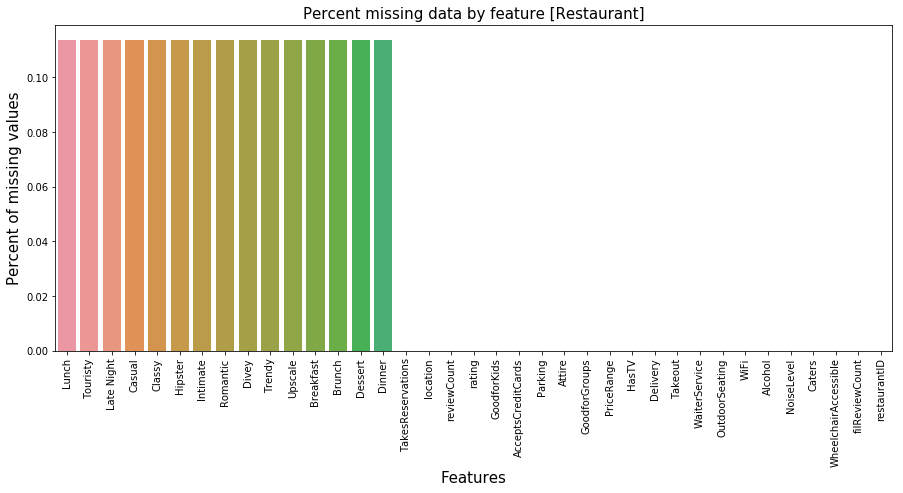

In [49]:
get_missing_value_graph(yelp_restaurant_preprocessed, "Restaurant")

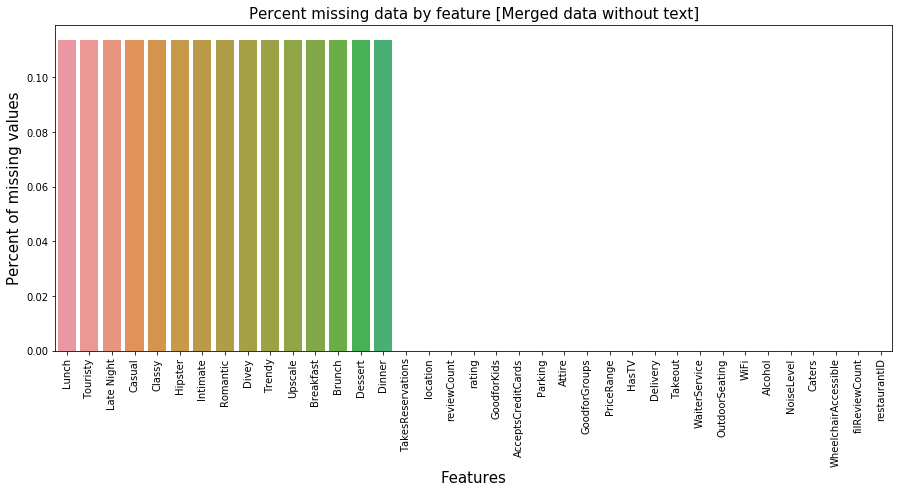

In [51]:
get_missing_value_graph(yelp_restaurant_preprocessed, "Merged data without text")

In [53]:
reviewID_1 = yelp_review_text["reviewID"]
reviewID_2 = yelp_review["reviewID"][yelp_review["labels"].isin([0,1])]

reviewID_1 = list(set(reviewID_1))
reviewID_2 = list(set(reviewID_2))

flag = 0
if(all(x in reviewID_2 for x in reviewID_1)): 
    flag = 1
      
# printing result 
if (flag) : 
    print ("Yes, list is subset of other.") 
else : 
    print ("No, list is not subset of other.") 

Yes, list is subset of other.


In [54]:
reviewerID_1 = yelp_reviewer["reviewerID"]
reviewerID_2 = yelp_review["reviewerID"]

reviewerID_1 = list(set(reviewerID_1))
reviewerID_2 = list(set(reviewerID_2))

flag = 0
if(all(x in reviewerID_2 for x in reviewerID_1)): 
    flag = 1
      
# printing result 
if (flag) : 
    print ("Yes, list is subset of other.") 
else : 
    print ("No, list is not subset of other.")

Yes, list is subset of other.


#### Merge all the data to create pre-processed dataframes

In [55]:
yelp_preprocessed_text = pd.merge(pd.merge(pd.merge(yelp_review_text, yelp_review, how='left', on="reviewID"), 
                                              yelp_reviewer, how='left', on="reviewerID"), yelp_restaurant_preprocessed, 
                                     how='left', on="restaurantID")

In [56]:
yelp_preprocessed = yelp_preprocessed_text.drop(yelp_review_text.columns, axis=1)

In [57]:
yelp_preprocessed.shape

(1000, 55)

In [58]:
yelp_preprocessed_text.shape

(1000, 71)

Drop the rows that have more than half of the columns with missing values.

In [59]:
thresh_text = yelp_preprocessed_text.shape[1]//2
yelp_preprocessed_text.dropna(thresh=thresh_text,inplace=True)

thresh_ = yelp_preprocessed.shape[1]//2
yelp_preprocessed.dropna(thresh=thresh_,inplace=True)

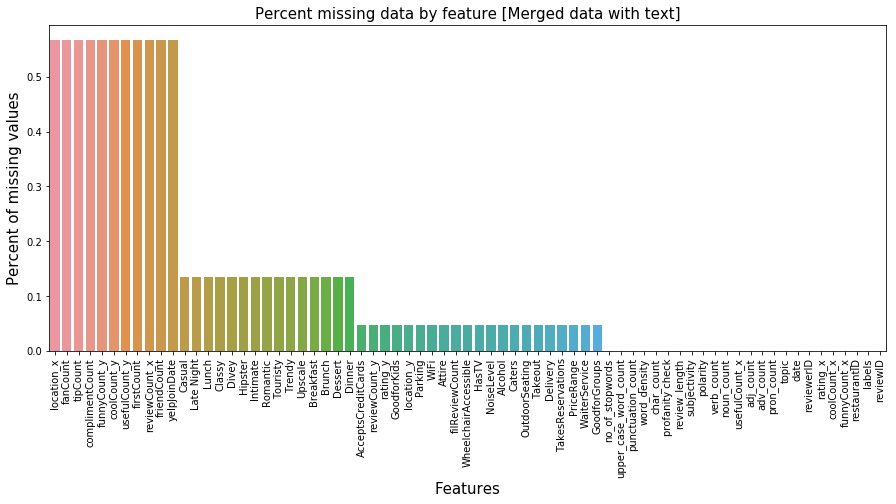

In [60]:
get_missing_value_graph(yelp_preprocessed_text, "Merged data with text")

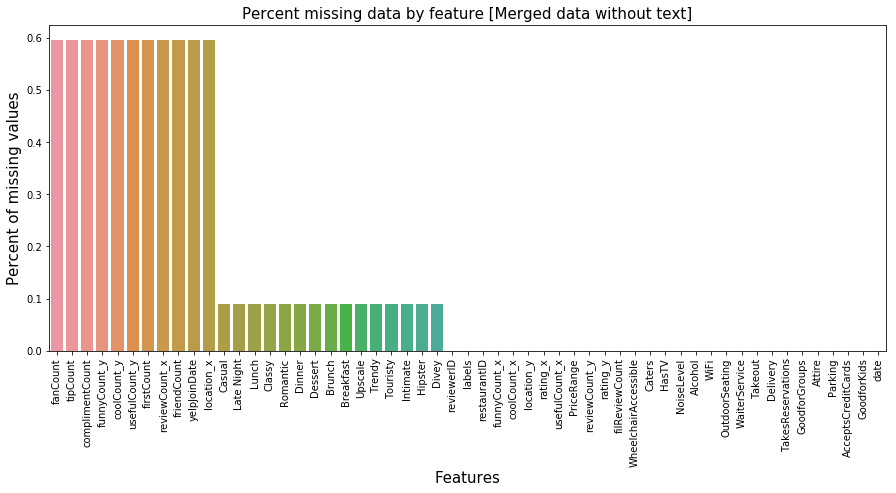

In [62]:
get_missing_value_graph(yelp_preprocessed, "Merged data without text")

In [63]:
yelp_preprocessed_text.fillna(9999, inplace=True)
yelp_preprocessed.fillna(9999, inplace=True)

In [64]:
yelp_preprocessed_text[['restaurantID','reviewerID']] = yelp_preprocessed_text[['restaurantID',
                                                                                'reviewerID']].astype(str).apply(
    le.fit_transform)

yelp_preprocessed[['restaurantID','reviewerID']] = yelp_preprocessed[['restaurantID','reviewerID']].astype(str).apply(
    le.fit_transform)

In [65]:
yelp_preprocessed_text.columns

Index(['reviewID', 'polarity', 'subjectivity', 'profanity check',
       'review_length', 'no_of_stopwords', 'char_count', 'word_density',
       'punctuation_count', 'upper_case_word_count', 'noun_count',
       'verb_count', 'adj_count', 'adv_count', 'pron_count', 'topic', 'date',
       'reviewerID', 'rating_x', 'usefulCount_x', 'coolCount_x',
       'funnyCount_x', 'restaurantID', 'labels', 'location_x', 'yelpJoinDate',
       'friendCount', 'reviewCount_x', 'firstCount', 'usefulCount_y',
       'coolCount_y', 'funnyCount_y', 'complimentCount', 'tipCount',
       'fanCount', 'location_y', 'reviewCount_y', 'rating_y', 'GoodforKids',
       'AcceptsCreditCards', 'Parking', 'Attire', 'GoodforGroups',
       'PriceRange', 'TakesReservations', 'Delivery', 'Takeout',
       'WaiterService', 'OutdoorSeating', 'WiFi', 'Alcohol', 'NoiseLevel',
       'HasTV', 'Caters', 'WheelchairAccessible', 'filReviewCount', 'Casual',
       'Classy', 'Divey', 'Hipster', 'Intimate', 'Romantic', 'Touristy'

In [66]:
yelp_preprocessed_text.drop(['reviewID'],axis=1, inplace=True)

In [67]:
X_text = yelp_preprocessed_text.loc[:, yelp_preprocessed_text.columns != 'labels']
y_text = yelp_preprocessed_text.loc[:, yelp_preprocessed_text.columns == 'labels']

X = yelp_preprocessed.loc[:, yelp_preprocessed.columns != 'labels']
y = yelp_preprocessed.loc[:, yelp_preprocessed.columns == 'labels']

In [68]:
X.shape

(909, 54)

In [69]:
X_text.shape

(955, 69)

In [ ]:
# saving the complete preprocessed data and the target labels to csv file for use with StackNet.py

X.to_csv("data/X_new.csv")
X_text.to_csv("data/X_text_new.csv")
y.to_csv("data/y_new.csv")
y_text.to_csv("data/y_text_new.csv")

In [71]:
from models_final import model_train_and_test

model_train_and_test(X, y)
model_train_and_test(X_text, y_text, text=True)